In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def Lagrange(x: [float], y: [float]):
    size = len(x)
    #Храним значения ячеек главной диагонали#
    P = []
    #Храним произведения строк, кроме ячеек главной диагонали#
    D = []
    for i in range(size):
        x_i = []
        D_i = 1
        for j in range(size):
            if (i == j):
                x_i.append(np.poly1d([1, -1 * x[i]]))
                P_i = x_i[j]
            else:
                x_i.append(x[i] - x[j])
                D_i = D_i * x_i[j]
        D.append(D_i)
        P.append(P_i)
    ans = np.poly1d([0])
    for i in range(size):
        p = np.poly1d([1])
        for j in range(size):
            if (j != i):
                p = p * P[j]
        ans = ans + p * y[i] / D[i] 
    return ans
#Функция возвращает многочлен Лагранжа максимальной степени#

In [56]:
def Lagrange_lin(x: [float], y: [float], x_0: float):
    #Окно интерполяции#
    x_l, x_r = -1, -1
    for i in range(len(x)):
        #Если спрашивается точка по которой точно известны данные, то ее считать не нужно#
        if np.isclose(x[i], x_0):
            return float(y[i])
        if (x[i] > x_0):
            x_r = i
            #Если точка меньше чем самая маленькая известная нам точка, то мы не можем знать поведение функции#
            if (x_l == -1):
                return False
            #Границы найдены, останавливаем поиск#
            else:
                break
        #Двигаем левую границу#
        x_l = i
    #Если точка больше чем самая большаяая известная нам точка, то мы не можем знать поведение функции#
    if (x_r == -1):
        return False
    #коэфиценты Лагранжа#
    P_l = (x_0 - x[x_r]) / (x[x_l] - x[x_r])
    P_r = (x_0 - x[x_l]) / (x[x_r] - x[x_l])
    return P_l * y[x_l] + P_r * y[x_r]
    

In [60]:
def Lagrange_parab(x: [float], y: [float], x_0: float):
    #Окно интерполяции#
    x_l, x_r = -1, -1
    for i in range(len(x)):
        #Если спрашивается точка по которой точно известны данные, то ее считать не нужно#
        if np.isclose(x[i], x_0):
            return y[i]
        if (x[i] > x_0):
            x_r = i
            #Если точка меньше чем самая маленькая известная нам точка, то мы не можем знать поведение функции#
            if (x_l == -1):
                return False
            #Границы найдены, останавливаем поиск#
            else:
                break
        #Двигаем левую границу#
        x_l = i
    #Если точка больше чем самая большаяая известная нам точка, то мы не можем знать поведение функции#
    if (x_r == -1):
        return False
    if (x_r == 1):
        #Второе окно#
        P_21 = (x_0 - x[x_r]) * (x_0 - x[x_r + 1]) / ((x[x_l] - x[x_r]) * (x[x_l] - x[x_r + 1]))
        P_22 = (x_0 - x[x_l]) * (x_0 - x[x_r + 1]) / ((x[x_r] - x[x_l]) * (x[x_r] - x[x_r + 1]))
        P_23 = (x_0 - x[x_l]) * (x_0 - x[x_r]) / ((x[x_r + 1] - x[x_l]) * (x[x_r + 1] - x[x_r]))
        return P_21 * y[x_l] + P_22 * y[x_r] + P_23 * y[x_r + 1]
    if (x_r == len(x) - 1):
        #Первое окно#
        P_11 = (x_0 - x[x_l]) * (x_0 - x[x_r]) / ((x[x_l - 1] - x[x_l]) * (x[x_l - 1] - x[x_r]))
        P_12 = (x_0 - x[x_l - 1]) * (x_0 - x[x_r]) / ((x[x_l] - x[x_l - 1]) * (x[x_l] - x[x_r]))
        P_13 = (x_0 - x[x_l - 1]) * (x_0 - x[x_l]) / ((x[x_r] - x[x_l]) * (x[x_r] - x[x_l - 1]))
        return P_11 * y[x_l - 1] + P_12 * y[x_l] + P_13 * y[x_r]
    #Первое окно#
    P_11 = (x_0 - x[x_l]) * (x_0 - x[x_r]) / ((x[x_l - 1] - x[x_l]) * (x[x_l - 1] - x[x_r]))
    P_12 = (x_0 - x[x_l - 1]) * (x_0 - x[x_r]) / ((x[x_l] - x[x_l - 1]) * (x[x_l] - x[x_r]))
    P_13 = (x_0 - x[x_l - 1]) * (x_0 - x[x_l]) / ((x[x_r] - x[x_l]) * (x[x_r] - x[x_l - 1]))
    #Второе окно#
    P_21 = (x_0 - x[x_r]) * (x_0 - x[x_r + 1]) / ((x[x_l] - x[x_r]) * (x[x_l] - x[x_r + 1]))
    P_22 = (x_0 - x[x_l]) * (x_0 - x[x_r + 1]) / ((x[x_r] - x[x_l]) * (x[x_r] - x[x_r + 1]))
    P_23 = (x_0 - x[x_l]) * (x_0 - x[x_r]) / ((x[x_r + 1] - x[x_l]) * (x[x_r + 1] - x[x_r]))
    return (P_11 * y[x_l - 1] + P_12 * y[x_l] + P_13 * y[x_r] + P_21 * y[x_l] + P_22 * y[x_r] + P_23 * y[x_r + 1]) / 2

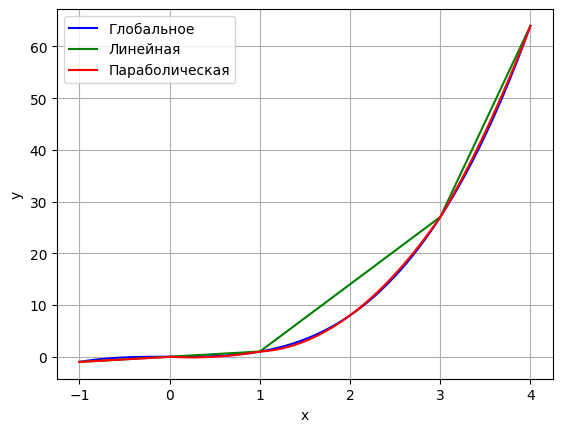

In [64]:
t = np.arange(-1, 4, 10**(-3))
x = [-1, 0, 1, 3, 4]
#Значения в точках#
y = [-1, 0, 1, 27, 64]
#Подразумевается функция f(x) = x ^ 3#
Lg = Lagrange(x, y)
plt.plot(t, Lg(t), color="blue", label = "Глобальное")
t_lin = []
for i in t:
    t_lin.append(Lagrange_lin(x, y, i))
plt.plot(t, np.array(t_lin), color="green", label = "Линейная")
t_parab = []
for i in t:
    t_parab.append(Lagrange_parab(x, y, i))
plt.plot(t, np.array(t_parab), color="red", label = "Параболическая")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()